# Linear Regression
Here are collection of codes for [linear regression blogpost](https://chuanfuyap.github.io/2022/12/11/linearregression/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## Quick visualisation

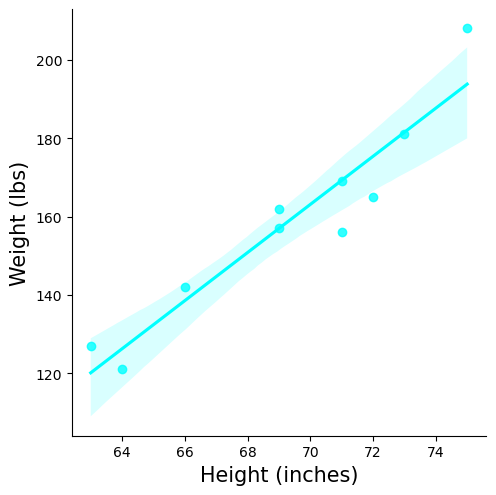

In [2]:
hw = pd.read_csv("data/student_height_weight.txt", sep='\t')
plt.Figure(dpi=120)
sns.lmplot(x='ht', y='wt', data=hw, scatter_kws={"color": "cyan"}, line_kws={"color": "cyan"})
plt.xlabel("Height (inches)", fontsize=15)
plt.ylabel("Weight (lbs)", fontsize=15)
plt.savefig('ht_wt1.png')

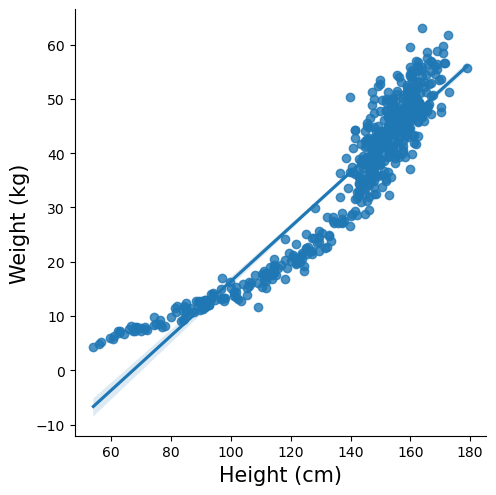

In [3]:
hw = pd.read_csv("data/Howell1.csv", sep=';')
plt.Figure(dpi=120)
sns.lmplot(x='height', y='weight', data=hw)
plt.xlabel("Height (cm)", fontsize=15)
plt.ylabel("Weight (kg)", fontsize=15)
plt.savefig('ht_wt2.png')

## Hypothesis Testing

In [4]:
import pandas as pd
import statsmodels.api as sm


# load data
df = pd.read_csv("data/student_height_weight.txt", sep='\t')
## setting the variable names
# For X we need to run this function to generate a columns of 1 to represent the intercept, you can check using X.head()
X = sm.add_constant(df.ht) 
y = df.wt

## build OLS object, which stands for ordinary least square, a type of regression model fitting. 
model = sm.OLS(y, X)
## fit the model
results = model.fit()

print(results.summary())

#### Alternative model building in statsmodels with formula

In [5]:
import statsmodels.formula.api as smf

In [6]:
model = smf.ols(formula='wt ~ ht', data=df)
results = model.fit()

## Prediction

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression

## load data
hw = pd.read_csv("data/Howell1.csv", sep=';')

## set variables names
X = hw[['height']]
y = hw[['weight']]
## fit and train model
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

## Residual vs Fit

In [8]:
## load data and fit model
alcohol = pd.read_csv("data/alcoholarm.txt", sep="\s+")
X = sm.add_constant(alcohol.alcohol)
y = alcohol.strength

model = sm.OLS(y, X).fit()

## extract values to plot
fitted = model.predict(X)
resid = model.resid

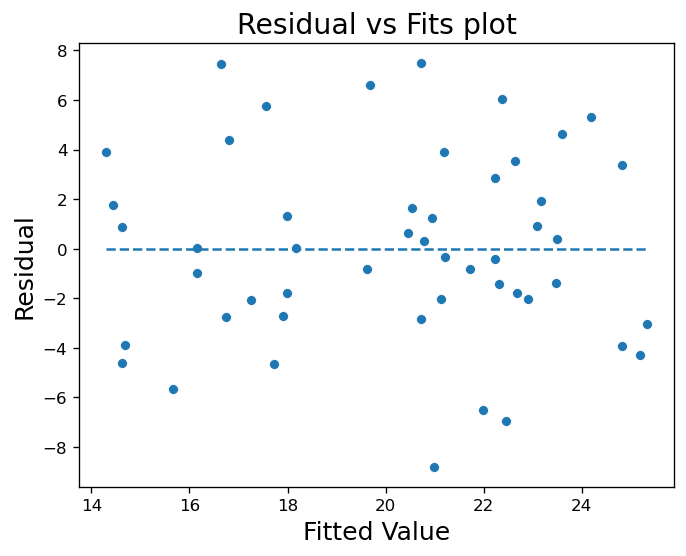

In [9]:
## scatter plot
plt.figure(dpi=120)
sns.scatterplot(x=fitted, y=resid)
# np is numpy package used to find min max value
plt.hlines(y=0, xmin = np.min(fitted), xmax=np.max(fitted), linestyle="--") 
plt.title("Residual vs Fits plot", fontsize=17)
plt.ylabel("Residual", fontsize=15)
plt.xlabel("Fitted Value", fontsize=15)
plt.savefig("resid_fit.png")

## Residual vs Order plot

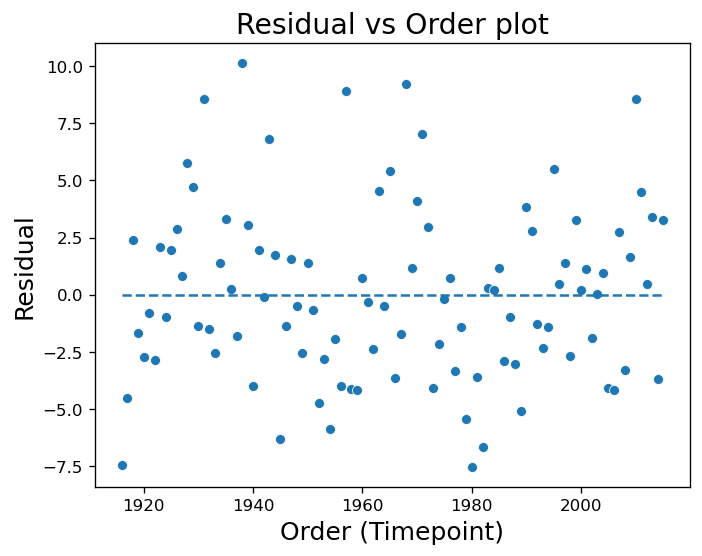

In [10]:
## load data and fit model
eq = pd.read_csv("data/earthquakes.txt", sep="\t", index_col=0)

X = sm.add_constant(eq.index)
y = eq.Quakes

model = sm.OLS(y, X).fit()

## extract values to plot
resid = model.resid

## scatter plot
plt.figure(dpi=120)
sns.scatterplot(x=eq.index, y=resid)
# np is numpy package used to find min max value
plt.hlines(y=0, xmin = np.min(eq.index), xmax=np.max(eq.index), linestyle="--") 
plt.title("Residual vs Order plot", fontsize=17)
plt.ylabel("Residual", fontsize=15)
plt.xlabel("Order (Timepoint)", fontsize=15)
plt.savefig("resid_order.png")

## Quantile-Quantile plot

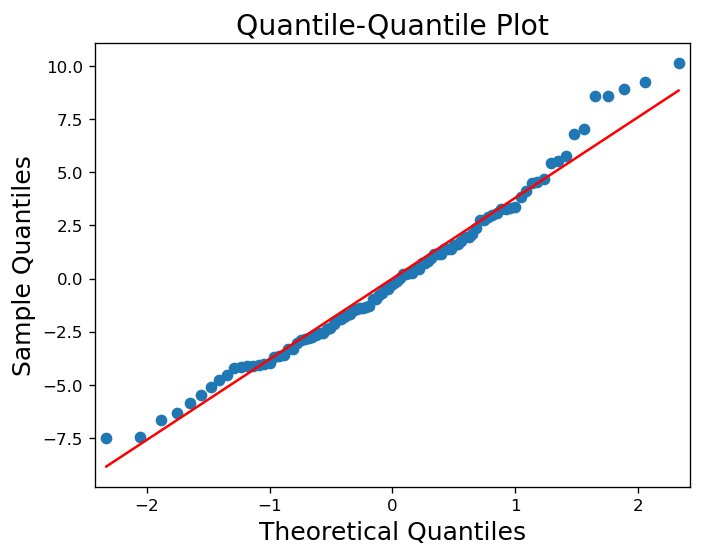

In [11]:
fig, ax = plt.subplots(dpi=120)
plt.title("Quantile-Quantile Plot", fontsize=17)

sm.qqplot(resid, line="s", ax=ax)
plt.ylabel("Sample Quantiles", fontsize=15)
plt.xlabel("Theoretical Quantiles", fontsize=15)


fig.savefig('qqplot.png')

## Residuals visualization

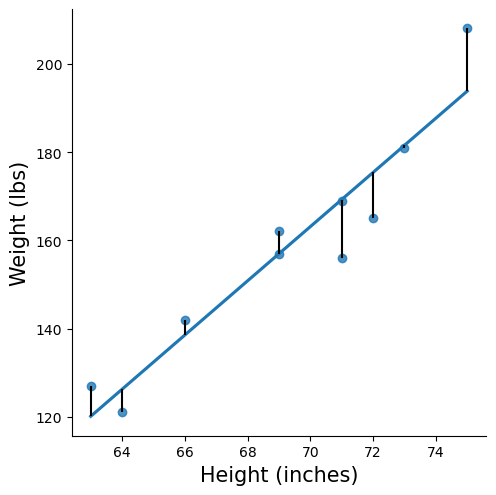

In [12]:
hw = pd.read_csv("data/student_height_weight.txt", sep='\t')
plt.Figure(dpi=120)
sns.lmplot(x='ht', y='wt', data=hw, ci = None)
plt.xlabel("Height (inches)", fontsize=15)
plt.ylabel("Weight (lbs)", fontsize=15)

X = sm.add_constant(hw.ht)
y = hw.wt

model = sm.OLS(y, X).fit()

fitted = model.predict(X)
resid = model.resid

for i, x in enumerate(hw.ht):
    fitted_value = fitted[i]
    actual_value = hw.wt[i]
    
    min_plot = min(fitted_value, actual_value)
    max_plot = max(fitted_value, actual_value)
    
    plt.vlines(x, min_plot, max_plot, color="k")
    
plt.savefig("resid_vis.png")

## Adjust for confounders

In [13]:
hw = pd.read_csv("data/student_height_weight.txt", sep='\t')
hw2 = hw.copy()

hw2["wt"] = hw2.wt +np.random.normal(0,2,10)
hw2["ht"] = (hw2.ht/1.3) +np.random.normal(0,2,10)

hw['Race'] = 'Human'
hw2['Race'] = 'Dwarf'


plothw = pd.concat([hw, hw2],axis=0)

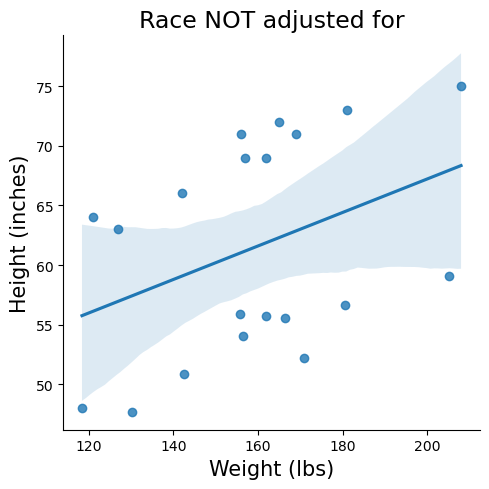

In [14]:
plt.Figure(dpi=120)
ax1=sns.lmplot(x='wt',y='ht', data=plothw)
plt.title("Race NOT adjusted for", fontsize=17)


plt.xlabel("Weight (lbs)", fontsize=15)
plt.ylabel("Height (inches)", fontsize=15)
plt.tight_layout()
plt.savefig('dwarf.png')

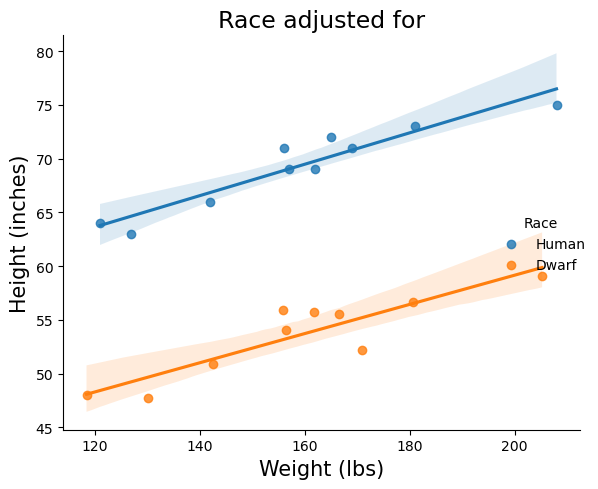

In [15]:
plt.Figure(dpi=120)
sns.lmplot(x='wt',y='ht', hue='Race', data=plothw)
plt.title("Race adjusted for", fontsize=17)


plt.xlabel("Weight (lbs)", fontsize=15)
plt.ylabel("Height (inches)", fontsize=15)
plt.tight_layout()
plt.savefig('dwarf2.png')

In [16]:
model = smf.ols(formula = "ht ~ wt + C(Race)", data=plothw)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     ht   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     304.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           4.86e-14
Time:                        22:42:34   Log-Likelihood:                -35.523
No. Observations:                  20   AIC:                             77.05
Df Residuals:                      17   BIC:                             80.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           31.1492      2.361  

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
plothw["coded_Race"] = le.fit_transform(plothw["Race"])

plothw["coded_Race"] = plothw["Race"].map({"Human":1, "Dwarf":0})
plothw.head()

,ht,wt,Race,coded_Race
0,63.0,127.0,Human,1
1,64.0,121.0,Human,1
2,66.0,142.0,Human,1
3,69.0,157.0,Human,1
4,69.0,162.0,Human,1


### Regressing out

In [18]:
plothw["residuals_race"] = results.resid
model = smf.ols(formula = "residuals_race ~ wt", data=plothw)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         residuals_race   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                -6.260e-15
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               1.00
Time:                        22:42:34   Log-Likelihood:                -35.523
No. Observations:                  20   AIC:                             75.05
Df Residuals:                      18   BIC:                             77.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.731e-13      2.269  -2.08e-13      1.0

In [19]:
model = smf.ols(formula = "ht ~ wt", data=plothw)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     ht   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.156
Date:                Sun, 11 Dec 2022   Prob (F-statistic):             0.0925
Time:                        22:42:34   Log-Likelihood:                -69.972
No. Observations:                  20   AIC:                             143.9
Df Residuals:                      18   BIC:                             145.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1133     12.704      3.079      0.0

## Interaction

In [20]:
import statsmodels.formula.api as smf

In [21]:
plothw["interact_term"] = plothw["ht"] *plothw["wt"]

In [22]:
model = smf.ols(formula = "ht ~ wt*C(Race)", data=plothw)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     ht   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     192.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           9.17e-13
Time:                        22:42:34   Log-Likelihood:                -35.449
No. Observations:                  20   AIC:                             78.90
Df Residuals:                      16   BIC:                             82.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              31.9860    

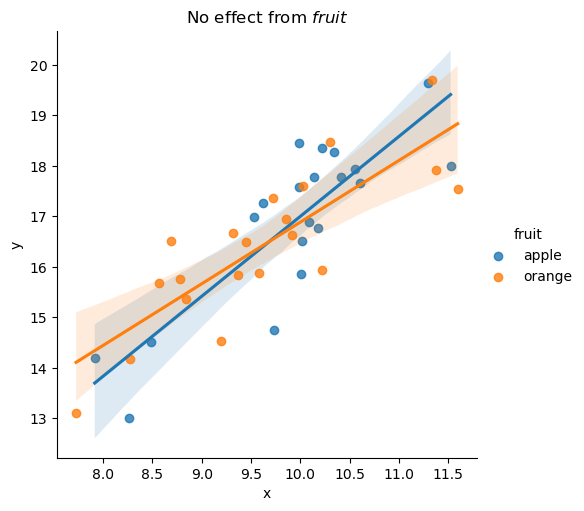

In [23]:
# example dataset
from scipy.stats import norm
b_0 = 2
b_1 = 1.5
b_2 = 1.5
e = norm.rvs(size=20)
x1 = norm.rvs(0, 1, size=20)+10
x2 = norm.rvs(0, 1, size=20)+10
y1 = b_0 + (b_1*x1) + e
y2 = b_0 + (b_2*x2) + e

tmp1 = pd.DataFrame([y1,x1], index=["y", "x"]).T
tmp1["fruit"] = "apple"
tmp2 = pd.DataFrame([y2,x2], index=["y", "x"]).T
tmp2["fruit"] = "orange"
ploteg = pd.concat([tmp1, tmp2], axis=0)

sns.lmplot(x="x", y="y", data=ploteg, hue="fruit")
plt.title("No effect from $fruit$")
plt.savefig('no_interact.png')

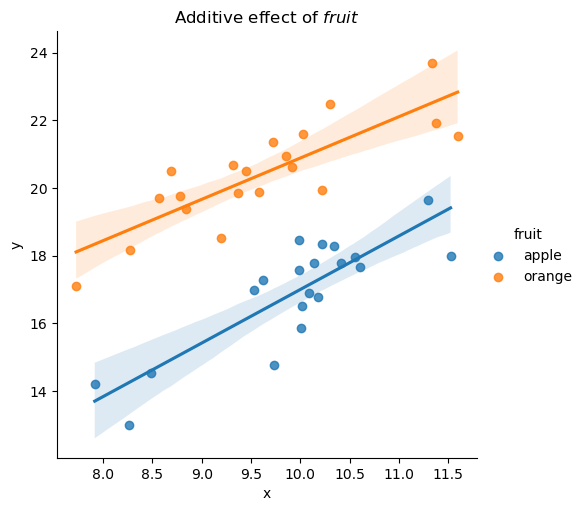

In [24]:
# example dataset
from scipy.stats import norm
y1 = b_0 + (b_1*x1) + e
y2 = 6 + (b_2*x2) + e

tmp2 = pd.DataFrame([y2,x2], index=["y", "x"]).T
tmp2["fruit"] = "orange"
ploteg = pd.concat([tmp1, tmp2], axis=0)

sns.lmplot(x="x", y="y", data=ploteg, hue="fruit")
plt.title("Additive effect of $fruit$")
plt.savefig('additive.png')

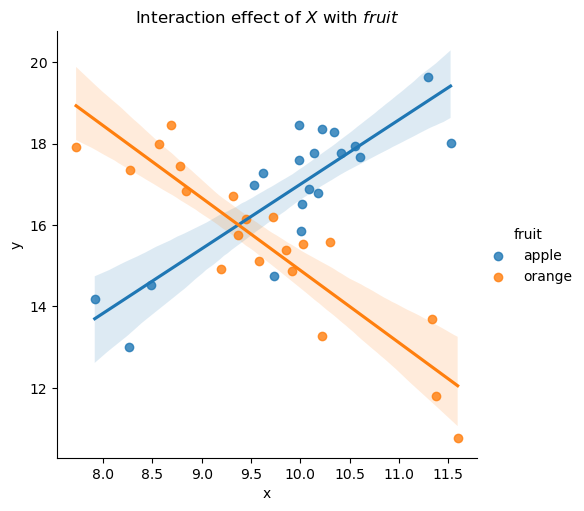

In [25]:
# example dataset
from scipy.stats import norm
b_2 = -1.5
y1 = b_0 + (b_1*x1) + e
y2 = 30 + (b_2*x2) + e

tmp2 = pd.DataFrame([y2,x2], index=["y", "x"]).T
tmp2["fruit"] = "orange"
ploteg = pd.concat([tmp1, tmp2], axis=0)

sns.lmplot(x="x", y="y", data=ploteg, hue="fruit")
plt.title("Interaction effect of $X$ with $fruit$")
plt.savefig('interact1.png')

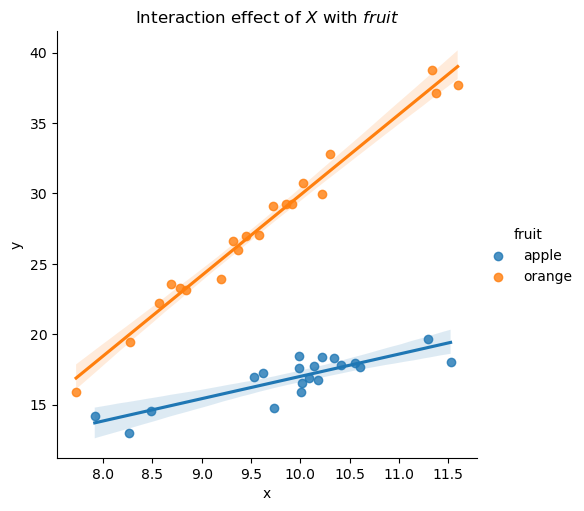

In [26]:
# example dataset
from scipy.stats import norm
b_2 = 6
y1 = b_0 + (b_1*x1) + e
y2 = -30 + (b_2*x2) + e

tmp2 = pd.DataFrame([y2,x2], index=["y", "x"]).T
tmp2["fruit"] = "orange"
ploteg = pd.concat([tmp1, tmp2], axis=0)

sns.lmplot(x="x", y="y", data=ploteg, hue="fruit")
plt.title("Interaction effect of $X$ with $fruit$")
plt.savefig('interact2.png')

In [27]:
model = smf.ols(formula = "y ~ x*C(fruit)", data=ploteg)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     765.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.20e-32
Time:                        22:42:36   Log-Likelihood:                -50.288
No. Observations:                  40   AIC:                             108.6
Df Residuals:                      36   BIC:                             115.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1549 

## Polynomial

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
x1 = np.arange(5, 500)

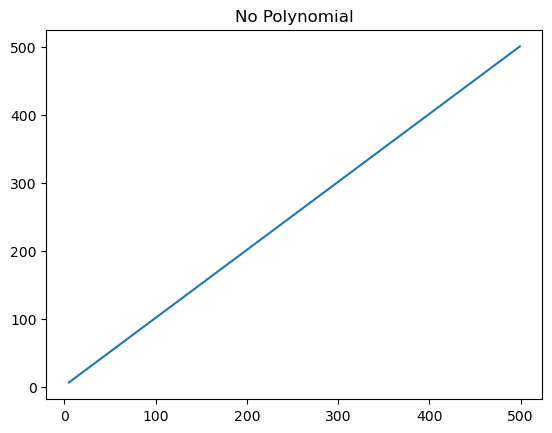

In [30]:
y = b_0 + x1

plt.title("No Polynomial")
plt.plot(x1, y)

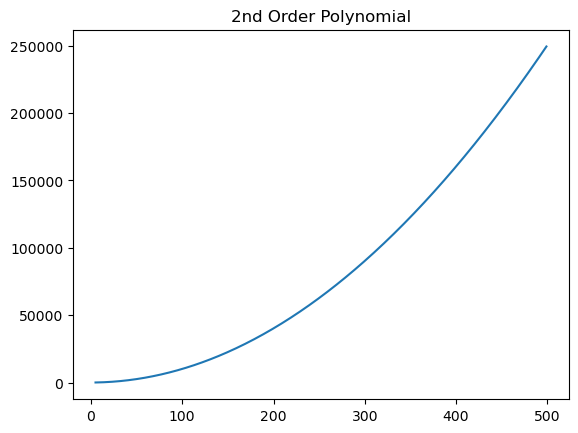

In [32]:
poly = PolynomialFeatures(2)

y = b_0 + x1 + poly.fit_transform(x1.reshape(-1, 1))[:,2]

plt.title("2nd Order Polynomial")
plt.plot(x1, y)

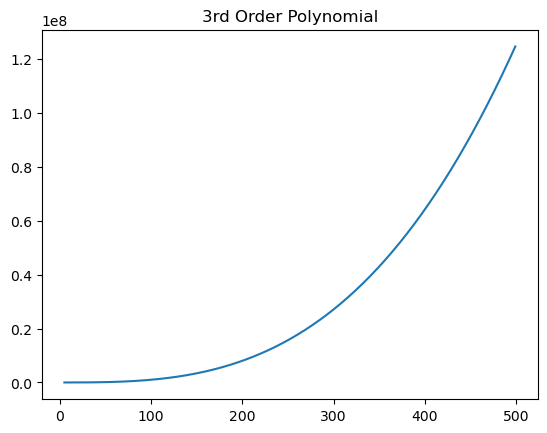

In [33]:
poly = PolynomialFeatures(3)
y = b_0 + x1 + poly.fit_transform(x1.reshape(-1, 1))[:,2]  + poly.fit_transform(x1.reshape(-1, 1))[:,3]

plt.title("3rd Order Polynomial")
plt.plot(x1, y)




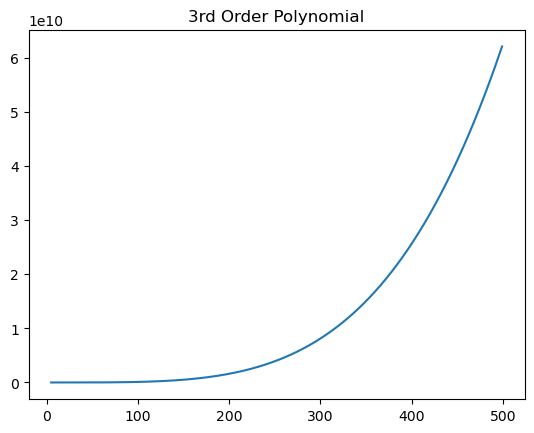

In [34]:
poly = PolynomialFeatures(4)
y = b_0 + x1 + poly.fit_transform(x1.reshape(-1, 1))[:,2]  + poly.fit_transform(x1.reshape(-1, 1))[:,3] + poly.fit_transform(x1.reshape(-1, 1))[:,4]


plt.title("3rd Order Polynomial")
plt.plot(x1, y)





# Model Building Algorithms
No comments/explanation, hopefully it makes sense on its own, if not feel free to reach out to me @yapchuanfu@gmail.com

## Stepwise Regression

In [35]:
def stepwise(X, y, alpha):
    """Stepwise Regression Algorithm
    This version of algorithm prioritises p-value of variables added to model. 
    
    X - features/independent variable
    y - target/dependent variable
    alpha - statistical significant threshold
    """
    candidates = set(X.columns)
    final = []
    
    potential = True
    
    while candidates and potential:
        pvalues = {}
        for col in candidates:
            feat = final.copy()
            feat.append(col)
            
            exog = sm.add_constant(X[feat])
            mod = sm.OLS(y, exog).fit()
            
            if mod.pvalues[col] < alpha:
                pvalues[col] = mod.pvalues[col]
            
        if not pvalues:
            potential=False
        else:            
            best = min(pvalues, key=pvalues.get)
            final.append(best)
            candidates.remove(best)
            
            drop=[]
            if len(final)>1:
                drop = checkprevious(X[final], y, alpha)
            if drop:
                [final.remove(i) for i in drop]
            
    exog = sm.add_constant(X[final])
    mod = sm.OLS(y, exog).fit() 
        
    return mod

def checkprevious(X, y, alpha):
    "used to check previous's model's p-value"
    todrop = []
    exog = sm.add_constant(X)
    mod = sm.OLS(y, exog).fit()
    
    for col in X.columns:
        p = mod.pvalues[col]
        if p > alpha:
            todrop.append(col)
    return todrop

## Best Subset Regression

In [36]:
from itertools import combinations

def bestsubset(X, y):
    """Best Subset Regression Algorithm
    This version of algorithm summarises R^2, and MSE of each subset models. 
    
    X - features/independent variable
    y - target/dependent variable
    """
    featcount = X.shape[1]
    
    colnames = ["FeatCount", "R2","Adj R2", "MSE"]
    feat = list(X.columns)
    colnames.extend(feat)
    
    df = pd.DataFrame(columns =colnames)
    track = 0
    for count in range(1, featcount+1):
        for x in combinations(feat, count):
            exog = sm.add_constant(X[list(x)])
            mod = sm.OLS(y, exog).fit()
            
            df = df.append({"FeatCount":count, "R2":mod.rsquared,
                       "Adj R2":mod.rsquared_adj, "MSE":np.sqrt(mod.mse_model)}, ignore_index=True)
            
            df.loc[track, feat]= 0
            df.loc[track, list(x)] = 1
            track+=1
            
            df[feat] = df[feat].astype(int)
            df["FeatCount"] = df["FeatCount"].astype(int)
            
    return condense(df)

def condense(dataframe):
    """
    Summarises best subset output.
    """
    df = []
    
    for i in dataframe.FeatCount.unique():
        subset = dataframe[dataframe.FeatCount==i]
        
        subset = subset.sort_values("R2", ascending=False)
        
        if subset.shape[0] >1:
            df.append(subset.iloc[:2, :])
        else:
            df.append(subset)
            
    return pd.concat(df, axis=0)